In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m = 10

In [23]:
def F_oracle(x, eps):
    F = np.sum(1/eps * (1 + np.arange(m))*x - np.log(1 - x ** 2))
    F_grad = 1/eps * (1 + np.arange(m)) + 2 * x / (1 - x ** 2)
    F_hessian = np.diag((2 + 2 * x **2)/ (1 - x ** 2)**2)
        
    return F, F_grad, F_hessian

def newton_step(x, eps):
    F, F_grad, F_hessian = F_oracle(x, eps)
    lmb = np.sqrt(F_grad.T @ np.linalg.inv(F_hessian) @ F_grad)
        
    return - 1 / (1 + lmb) * np.linalg.inv(F_hessian) @ F_grad, lmb

In [28]:
eps_list = [1, 0.1, 0.01, 0.005]
lmb_hists = []

for eps in eps_list:
    lmb_hist = []
    x = np.zeros(m)
    lmb = np.inf
    t = 1
    while lmb > 1e-6:
        step, lmb = newton_step(x, eps)
        x = x + step
        t += 1
        lmb_hist.append(lmb)
    lmb_hists.append(lmb_hist)

    print(eps, t)

1 12
0.1 18
0.01 24
0.005 26


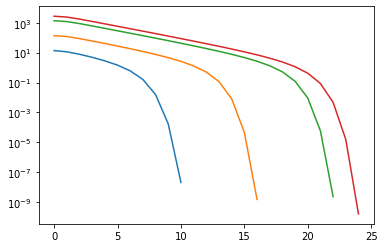

In [31]:
plt.yscale('log')
for lmb_hist in enumerate(lmb_hists):
    plt.plot(lmb_hist, label)
plt.show()